In [1]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# ✅ Step 2: Load and Explore the Dataset
df = pd.read_csv("heart.csv")

In [3]:
# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# ✅ Step 3: Split Data into Features and Target
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target (1 = has disease, 0 = no disease)

In [5]:
# ✅ Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# ✅ Step 5: Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# ✅ Step 6: Evaluate the Decision Tree
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



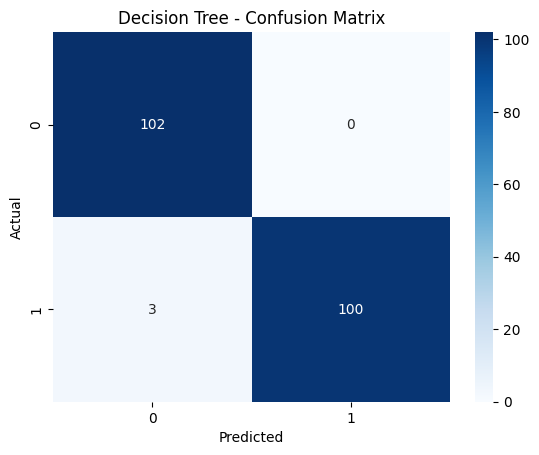

In [8]:
# ✅ Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

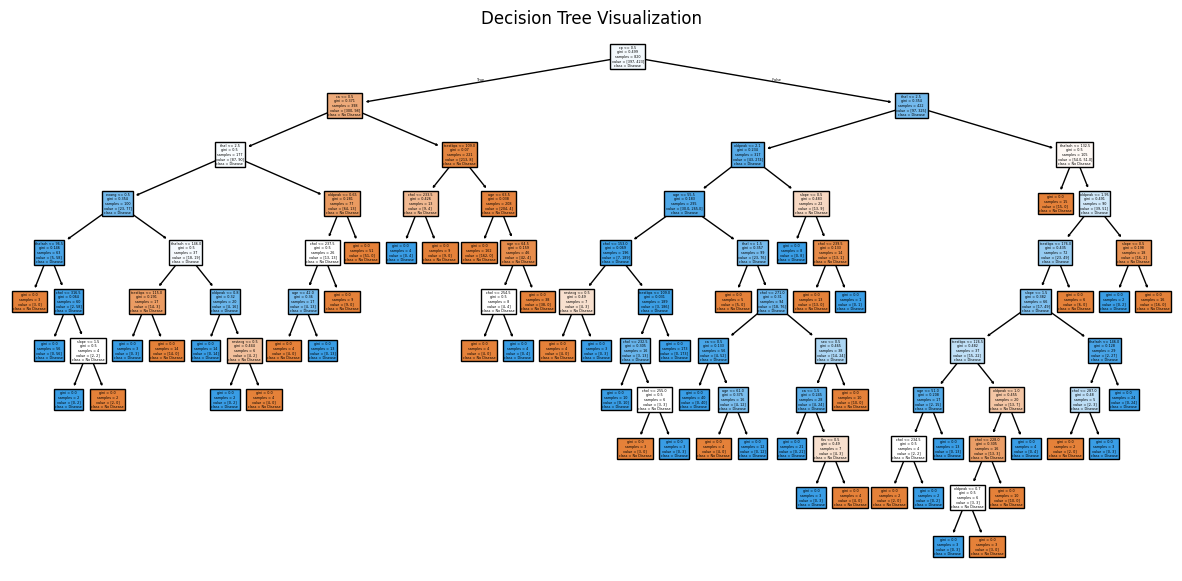

In [9]:
# ✅ Step 8: Visualize the Decision Tree
plt.figure(figsize=(15, 7))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
# ✅ Step 9: Handle Overfitting with max_depth
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("\nPruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.8


In [11]:
# ✅ Step 10: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
# ✅ Step 11: Evaluate the Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [13]:
# ✅ Step 12: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

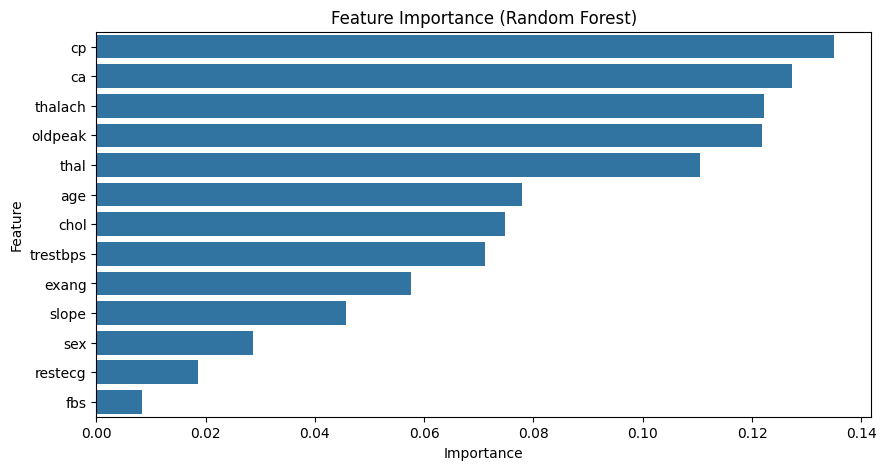

In [14]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [15]:
# ✅ Step 13: Cross-Validation (Random Forest)
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores (5 folds):", cross_val_scores)
print("Average CV accuracy:", np.mean(cross_val_scores))


Cross-validation scores (5 folds): [1.         1.         1.         1.         0.98536585]
Average CV accuracy: 0.9970731707317073


In [16]:
new_patient = pd.DataFrame([{
    'age': 52,
    'sex': 1,
    'cp': 0,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 160,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}])


In [17]:
# Predict using the decision tree model
prediction_dt = dt_model.predict(new_patient)
print("Decision Tree Prediction (0 = No Disease, 1 = Disease):", prediction_dt[0])

# Predict using the random forest model
prediction_rf = rf_model.predict(new_patient)
print("Random Forest Prediction (0 = No Disease, 1 = Disease):", prediction_rf[0])


Decision Tree Prediction (0 = No Disease, 1 = Disease): 1
Random Forest Prediction (0 = No Disease, 1 = Disease): 1


In [18]:
# Probability of having disease (Random Forest)
prob_rf = rf_model.predict_proba(new_patient)[0][1]
print("Probability of heart disease (Random Forest):", round(prob_rf * 100, 2), "%")

Probability of heart disease (Random Forest): 90.0 %
